We will try to compare city population vs. median sale prices of homes from a sample dataset dumped in Cassandra and retrieved via Python, then running Machine Learning algorithms. 

Basic idea to introduce how to fetch data from the cassandra, convert to dataframes and then feed into machine learning algorithms using Python.

Here we will be implementing Linear Regression.

In [95]:
%matplotlib inline 
from cassandra.cluster import Cluster
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Connecting to the Cassandra
Connecting to different clusters if in place. In our case, we have installed Cassandra locally.

In [96]:
cluster = Cluster(['127.0.0.1'])

# Connecting to the Keyspace where we have imported our data into a table

In [97]:
session = cluster.connect('demo')

Prices is the table name created in "demo" keyspace.
We need to convert to dataframe for executing basic exploratory data analysis and also pass it to ml algos.

In [98]:
rows = session.execute('select * from prices2;')
df = pd.DataFrame(list(rows))

Now we have converted to a dataframe, where we can see the data in a pretty good format.

In [99]:
df

,city,state,statecode,medprice2015,popest2014,rank2014
0,Jacksonville[9],Florida,FL,182.500000,853382,12
1,San Antonio,Texas,TX,184.699997,1436697,7
2,Lakeland,Florida,FL,136.000000,102346,290
3,Salem,Oregon,OR,193.899994,161637,152
4,Cedar Rapids,Iowa,IA,156.899994,129195,203
5,Anaheim,California,CA,685.700012,346997,56
6,Davenport,Iowa,IA,109.400002,102448,289
7,Spokane,Washington,WA,180.199997,212052,102
8,San Jose,California,CA,900.000000,1015785,10
9,Louisville[16],Kentucky,KY,141.100006,612780,30


# Basic Operations on the dataframe

In [100]:
df['city'].count()

109

In [101]:
df['city'][1:5]

1     San Antonio
2        Lakeland
3           Salem
4    Cedar Rapids
Name: city, dtype: object

In [102]:
max(df['popest2014'])

8491079

# Lets visualize the two variables, see if there are any extreme values.
To visualize in the jupyter(ipython), we need to mention "%matplotlib inline" .

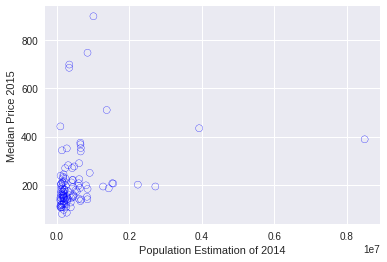

In [103]:
scatter( df.popest2014, df.medprice2015,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=1 )
xlabel('Population Estimation of 2014')
ylabel('Median Price 2015')


From the plot we see that there is an outlier (it depends on the problem you are working on). This is just for an example. We need to further investigate on this observation and take decision whether to include it in the dataset or not. Lets try removing that extreme point and plot.

In [106]:
df = df[df.popest2014 != max(df['popest2014']) ]
max(df['popest2014'])

2239558

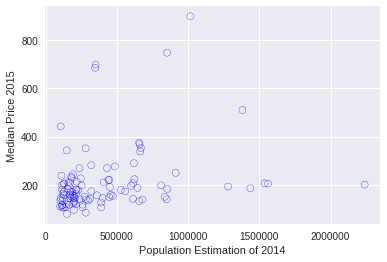

In [107]:
scatter( df.popest2014, df.medprice2015,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=1 )
xlabel('Population Estimation of 2014')
ylabel('Median Price 2015')

From the plot, you can see that the datapoints are spread across.

In [86]:
data = np.matrix( df )

In [87]:
X=data[:,4]
X[:-1]

matrix([[853382],
        [1436697],
        [102346],
        [161637],
        [129195],
        [346997],
        [102448],
        [212052],
        [1015785],
        [612780],
        [388413],
        [197254],
        [169854],
        [168586],
        [679036],
        [658893],
        [198242],
        [445830],
        [2239558],
        [350399],
        [127215],
        [160561],
        [117585],
        [128460],
        [258522],
        [1537058],
        [358699],
        [171155],
        [105112],
        [120958],
        [389521],
        [319504],
        [470800],
        [281031],
        [835957],
        [113657],
        [188226],
        [184281],
        [236995],
        [174110],
        [407207],
        [1381069],
        [450980],
        [619360],
        [149123],
        [320434],
        [656861],
        [147612],
        [190884],
        [115828],
        [399682],
        [655884],
        [251893],
        [216282],
        [188107],
     

In [88]:
model = LinearRegression()

X, Y = data[:,4], data[:,3]
model.fit( X, Y )

In [89]:
model_score

'0.054'

In [90]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [91]:
# The coefficients
print('Coefficients: \n', model.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean(np.asarray(model.predict(X) - Y) ** 2))
print("Mean squared error: %.2f"
      % sqrt(np.mean(np.asarray(model.predict(X) - Y) ** 2)))

('Coefficients: \n', array([[  7.14520158e-05]]))
Mean squared error: 16411.39
Mean squared error: 128.11
